In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy the benchmark tool to the current session
! cp -r '/content/drive/My Drive/code/.' .

In [3]:
from agent.agent import Agent
from functions import *
import sys

if len(sys.argv) != 4:
	print("Usage: python train.py [stock] [window] [episodes]")
	exit()

stock_name, window_size, episode_count =  'AMZN_Test', 10, 1

agent = Agent(window_size)
data = getStockDataVec(stock_name)
l = len(data) - 1
batch_size = 32
from tqdm import tqdm

for e in tqdm(range(episode_count + 1)):
	print("Episode " + str(e) + "/" + str(episode_count))
	state = getState(data, 0, window_size + 1)

	total_profit = 0
	agent.inventory = []

	for t in range(l):
		action = agent.act(state)

		# sit
		next_state = getState(data, t + 1, window_size + 1)
		reward = 0

		if action == 1: # buy
			agent.inventory.append(data[t])
			print("Buy: " + formatPrice(data[t]))

		elif action == 2 and len(agent.inventory) > 0: # sell
			bought_price = agent.inventory.pop(0)
			reward = max(data[t] - bought_price, 0)
			total_profit += data[t] - bought_price
			print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

		done = True if t == l - 1 else False
		agent.memory.append((state, action, reward, next_state, done))
		state = next_state

		if done:
			print("--------------------------------")
			print("Total Profit: " + formatPrice(total_profit))
			print("--------------------------------")

		if len(agent.memory) > batch_size:
			agent.expReplay(batch_size)

	


Usage: python train.py [stock] [window] [episodes]


  0%|          | 0/2 [00:00<?, ?it/s]

Episode 0/1
Buy: $346.20
Sell: $354.44 | Profit: $8.24
Buy: $359.76
Sell: $360.84 | Profit: $1.08
Buy: $324.01
Buy: $320.41
Sell: $322.51 | Profit: -$1.50
Sell: $312.99 | Profit: -$7.42
Buy: $335.78
Sell: $341.83 | Profit: $6.05
Buy: $343.18
Buy: $340.02
Sell: $342.38 | Profit: -$0.80
Sell: $339.00 | Profit: -$1.02
Buy: $346.38
Buy: $329.75
Buy: $330.52
Buy: $327.76
Buy: $331.32
Sell: $324.50 | Profit: -$21.88
Buy: $323.63
Sell: $328.21 | Profit: -$1.54
Sell: $321.93 | Profit: -$8.59
Sell: $323.21 | Profit: -$4.55
Sell: $321.82 | Profit: -$9.50
Buy: $318.41
Sell: $322.20 | Profit: -$1.43
Buy: $316.98
Buy: $311.39
Sell: $305.97 | Profit: -$12.44
Sell: $302.86 | Profit: -$14.12
Sell: $303.64 | Profit: -$7.75
Buy: $312.97
Buy: $313.18
Buy: $287.06
Sell: $295.59 | Profit: -$17.38
Sell: $294.12 | Profit: -$19.06
Buy: $302.81
Sell: $296.52 | Profit: $9.46
Sell: $299.86 | Profit: -$2.95
Buy: $305.11
Buy: $312.01
Sell: $311.51 | Profit: $6.40
Sell: $327.82 | Profit: $15.81
Buy: $324.93
Sell: $

 50%|█████     | 1/2 [12:51<12:51, 771.29s/it]

Episode 1/1
Buy: $332.85
Sell: $337.49 | Profit: $4.64
Buy: $358.66
Sell: $359.76 | Profit: $1.10
Buy: $307.06
Sell: $313.65 | Profit: $6.59
Buy: $334.02
Sell: $341.83 | Profit: $7.81
Buy: $345.95
Sell: $346.38 | Profit: $0.43
Buy: $329.75
Sell: $331.33 | Profit: $1.58
Buy: $330.52
Buy: $331.19
Buy: $323.89
Buy: $327.76
Buy: $324.00
Buy: $325.00
Buy: $331.32
Buy: $324.50
Buy: $323.63
Buy: $328.21
Buy: $321.93
Sell: $323.21 | Profit: -$7.31
Buy: $321.82
Buy: $322.44
Buy: $317.46
Buy: $318.41
Buy: $322.74
Buy: $322.20
Sell: $316.98 | Profit: -$14.21
Buy: $322.70
Buy: $315.37
Buy: $311.39
Buy: $306.45
Buy: $308.31
Buy: $305.97
Buy: $302.86
Buy: $303.64
Sell: $306.21 | Profit: -$17.68
Buy: $315.33
Buy: $312.97
Sell: $313.18 | Profit: -$14.58
Buy: $287.06
Buy: $289.97
Buy: $295.59
Buy: $299.07
Buy: $305.46
Sell: $305.72 | Profit: -$18.28
Buy: $302.81
Buy: $296.52
Buy: $296.64
Buy: $299.86
Buy: $305.11
Buy: $312.01
Sell: $316.48 | Profit: -$8.52
Sell: $327.82 | Profit: -$3.50
Buy: $323.05
Bu

100%|██████████| 2/2 [27:31<00:00, 825.81s/it]


--------------------------------
AMZN_Test Total Profit: $135.41
--------------------------------


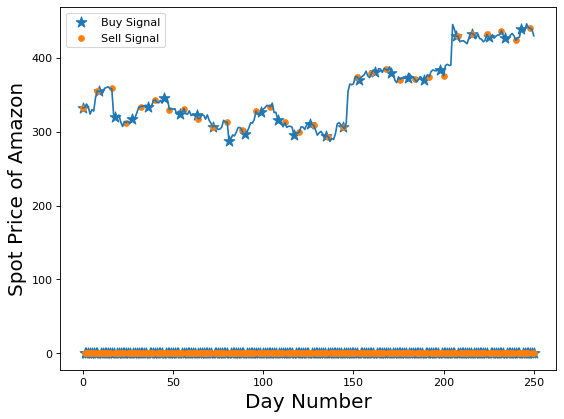

In [3]:
import keras
from keras.models import load_model

from agent.agent import Agent
from functions import *
import sys

if len(sys.argv) != 3:
    print("Usage: python evaluate.py [stock] [model]")
    exit()

stock_name, model_name = 'AMZN_Test', 'model_ep0'
model = load_model("models/" + model_name)
window_size = model.layers[0].input.shape.as_list()[1]

agent = Agent(window_size, True, model_name)
data = getStockDataVec(stock_name)

l = len(data) - 1
batch_size = 32


total_profit = 0
agent.inventory = []
buy_arr = np.zeros((l,1))
sell_arr = np.zeros((l,1))

state = getState(data, 0, window_size + 1)

for t in range(l):
  action = agent.act(state)
  
  
  
  #print(action)
  next_state = getState(data, t + 1, window_size + 1)
  reward = 0
  if action == 1:
    agent.inventory.append(data[t])
    buy_arr[t] = data[t]
    
    print("Buy: " + formatPrice(data[t]))

  elif action == 2 and len(agent.inventory) > 0:
    sell_arr[t] = data[t]
    bought_price = agent.inventory.pop(0)
    reward = max(data[t] - bought_price, 0)
    total_profit += data[t] - bought_price
    print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

  done = True if t == l - 1 else False
  agent.memory.append((state, action, reward, next_state, done))
  state = next_state


  if done:
    print("--------------------------------")
    print(stock_name + " Total Profit: " + formatPrice(total_profit))
    print("--------------------------------")




import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
data = getStockDataVec(stock_name)
arr = range(l)
plt.plot(arr,data[0:l])
plt.scatter(arr,buy_arr,marker='*',s=100,label='Buy Signal')
plt.scatter(arr,sell_arr,marker='.',s=100,label='Sell Signal')
plt.rcParams['figure.figsize'] = [15, 15]
plt.legend()
plt.xlabel('Day Number',fontsize=18)
plt.ylabel('Spot Price of Amazon',fontsize=18)
plt.show()
# plt.savefig('FB.png')
# from google.colab import files
# files.download('FB.png')